In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# Make plots interactive
%matplotlib notebook

In [3]:
# Load Oscars Demographics CSV
df = pd.read_csv("./Oscars-demographics-FinalEditedCSV.csv")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,movie,person,biourl,Winner or Nominee,race_ethnicity_gold,religion_gold,date_of_birth_gold,birthplace_gold,sexual_orientation_gold,year_of_award_gold
0,670454440.0,False,finalized,3.0,2/10/15 2:04,"Rorschach, Switzerland",1.0,23-Jul-1884,1.0,White,...,The Last Command,Emil Jannings,http://www.nndb.com/people/738/000063549/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,670454353.0,False,finalized,3.0,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Two Arabian Knights,Lewis Milestone,http://www.nndb.com/people/320/000043191/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,670454604.0,False,finalized,3.0,2/10/15 1:57,"Philadelphia, Pa",1.0,6-Oct-06,1.0,White,...,7th Heaven,Janet Gaynor,http://www.nndb.com/people/129/000043000/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,False,finalized,3.0,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,7th Heaven,Frank Borzage,http://www.nndb.com/people/292/000044160/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,670454354.0,False,finalized,3.0,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,The Divine Lady,Frank Lloyd,http://www.nndb.com/people/626/000042500/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(df.columns)

['_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'birthplace',
 'birthplace:confidence',
 'date_of_birth',
 'date_of_birth:confidence',
 'race_ethnicity',
 'race_ethnicity:confidence',
 'religion',
 'religion:confidence',
 'sexual_orientation',
 'sexual_orientation:confidence',
 'year_of_award:confidence',
 'year_of_award',
 'award',
 'movie',
 'person',
 'biourl',
 'Winner or Nominee',
 'race_ethnicity_gold',
 'religion_gold',
 'date_of_birth_gold',
 'birthplace_gold',
 'sexual_orientation_gold',
 'year_of_award_gold']

In [5]:
race_sexual_orientation_df = df.loc[:, ['race_ethnicity','religion','sexual_orientation','year_of_award','award',
                                        'biourl','movie','person']]
race_sexual_orientation_df

,race_ethnicity,religion,sexual_orientation,year_of_award,award,biourl,movie,person
0,White,Na,Bisexual,1928,Best Actor,http://www.nndb.com/people/738/000063549/,The Last Command,Emil Jannings
1,White,Na,Straight,1928,Best Director (Comedy),http://www.nndb.com/people/320/000043191/,Two Arabian Knights,Lewis Milestone
2,White,Na,Straight,1928,Best Actress,http://www.nndb.com/people/129/000043000/,7th Heaven,Janet Gaynor
3,White,Roman Catholic,Straight,1928,Best Director (Drama),http://www.nndb.com/people/292/000044160/,7th Heaven,Frank Borzage
4,White,Na,Straight,1929,Best Director,http://www.nndb.com/people/626/000042500/,The Divine Lady,Frank Lloyd
...,...,...,...,...,...,...,...,...
444,White,Na,Straight,2019,Best Actress,https://www.nndb.com/people/708/000024636/,Judy,Renée Zellweger
445,White,Na,Straight,2019,Best Supporting Actress,https://www.nndb.com/people/564/000023495/,Marriage Story,Laura Dern
446,White,Na,Straight,2019,Best Actor,https://www.nndb.com/people/898/000025823/,Joker,Joaquin Phoenix
447,White,Na,Straight,2019,Best Supporting Actor,https://www.nndb.com/people/688/000025613/,Once upon a Time…in Hollywood,Brad Pitt


In [6]:
# create x-axis for year award was received 
x_axis = np.arange(1927,2020)
x_axis

array([1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [ ]:
# find values in race_ethnicity column
race_sexual_orientation_df.race_ethnicity.unique()

In [ ]:
# find value counts for each listed race
race_sexual_orientation_df['race_ethnicity'].value_counts()

In [ ]:
asian_counts = race_sexual_orientation_df.groupby(["race_ethnicity", "year_of_award"]).count()["award"].loc["Asian"]
asian_counts.name = "Asian Award Count"


black_counts = race_sexual_orientation_df.groupby(["race_ethnicity", "year_of_award"]).count()["award"].loc["Black"]
black_counts.name = "Black Award Count"


hispanic_counts = race_sexual_orientation_df.groupby(["race_ethnicity", "year_of_award"]).count()["award"].loc["Hispanic"]
hispanic_counts.name = "Hispanic Award Count"


middle_eastern_counts = race_sexual_orientation_df.groupby(["race_ethnicity", "year_of_award"]).count()["award"].loc["Middle Eastern"]
middle_eastern_counts.name = "Middle Eastern Award Count"


multiracial_counts = race_sexual_orientation_df.groupby(["race_ethnicity", "year_of_award"]).count()["award"].loc["Multiracial"]
multiracial_counts.name = "Multiracial Award Count"

In [ ]:
asian_counts.plot(style=".")
black_counts.plot(style="x")
hispanic_counts.plot(style="+")
middle_eastern_counts.plot(style="*")
multiracial_counts.plot(style="^")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of Winners by Years According to Race")
plt.xlabel("Years")
plt.ylabel("Number of Award Winners")

# Save an image of the chart and print final product to the screen
plt.savefig("./RacePyPlt.png")
plt.show()

In [ ]:
# Plot Pie Chart according to race
race_ethnicity = ["White", "Asian", "Black", "Hispanic", "Multiracial", "Middle Eastern"]
award_count = [409,5,18,13,2,2]
colors = ["yellow","green","lightblue","orange","red","purple"]
explode = (0,1,2,3,4,5)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(award_count, explode=explode, labels=race_ethnicity, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("./RacePyPies.png")
plt.show()

In [7]:
# find values in sexual_orientation column
race_sexual_orientation_df.sexual_orientation.unique()

array(['Bisexual', 'Straight', 'Gay', 'Matter of Dispute', 'Na',
       'Lesbian'], dtype=object)

In [8]:
# find value counts for each listed sexual orientation
race_sexual_orientation_df['sexual_orientation'].value_counts()

Straight             408
Bisexual              20
Na                     8
Gay                    7
Lesbian                3
Matter of Dispute      3
Name: sexual_orientation, dtype: int64

In [9]:
# Given that "Straight" is the overwhelming subgroup of winners within the sexual_orientation category, 
# count non-Straight winners by year to visualize diversity trends over the years
bisexual_counts = race_sexual_orientation_df.groupby(["sexual_orientation", "year_of_award"]).count()["award"].loc["Bisexual"]
bisexual_counts.name = "Bisexual Award Count"

na_counts = race_sexual_orientation_df.groupby(["sexual_orientation", "year_of_award"]).count()["award"].loc["Na"]
na_counts.name = "Na Award Count"


gay_counts = race_sexual_orientation_df.groupby(["sexual_orientation", "year_of_award"]).count()["award"].loc["Gay"]
gay_counts.name = "Gay Award Count"


matter_of_dispute_counts = race_sexual_orientation_df.groupby(["sexual_orientation", "year_of_award"]).count()["award"].loc["Matter of Dispute"]
matter_of_dispute_counts.name = "Matter of Dispute Award Count"

lesbian_counts = race_sexual_orientation_df.groupby(["sexual_orientation", "year_of_award"]).count()["award"].loc["Lesbian"]
lesbian_counts.name = "Lesbian Award Count"


In [ ]:
# Plot graph for numbers of non-Straight winners according to years

bisexual_counts.plot(style=".")
na_counts.plot(style="x")
gay_counts.plot(style="+")
matter_of_dispute_counts.plot(style="*")
lesbian_counts.plot(style="^")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Number of Winners by Years According to Sexual Orientation")
plt.xlabel("Years")
plt.ylabel("Number of Award Winners")

# Save an image of the chart and print final product to the screen
plt.savefig("./SexualOrientationPyPlt.png")
plt.show()

<IPython.core.display.Javascript object>


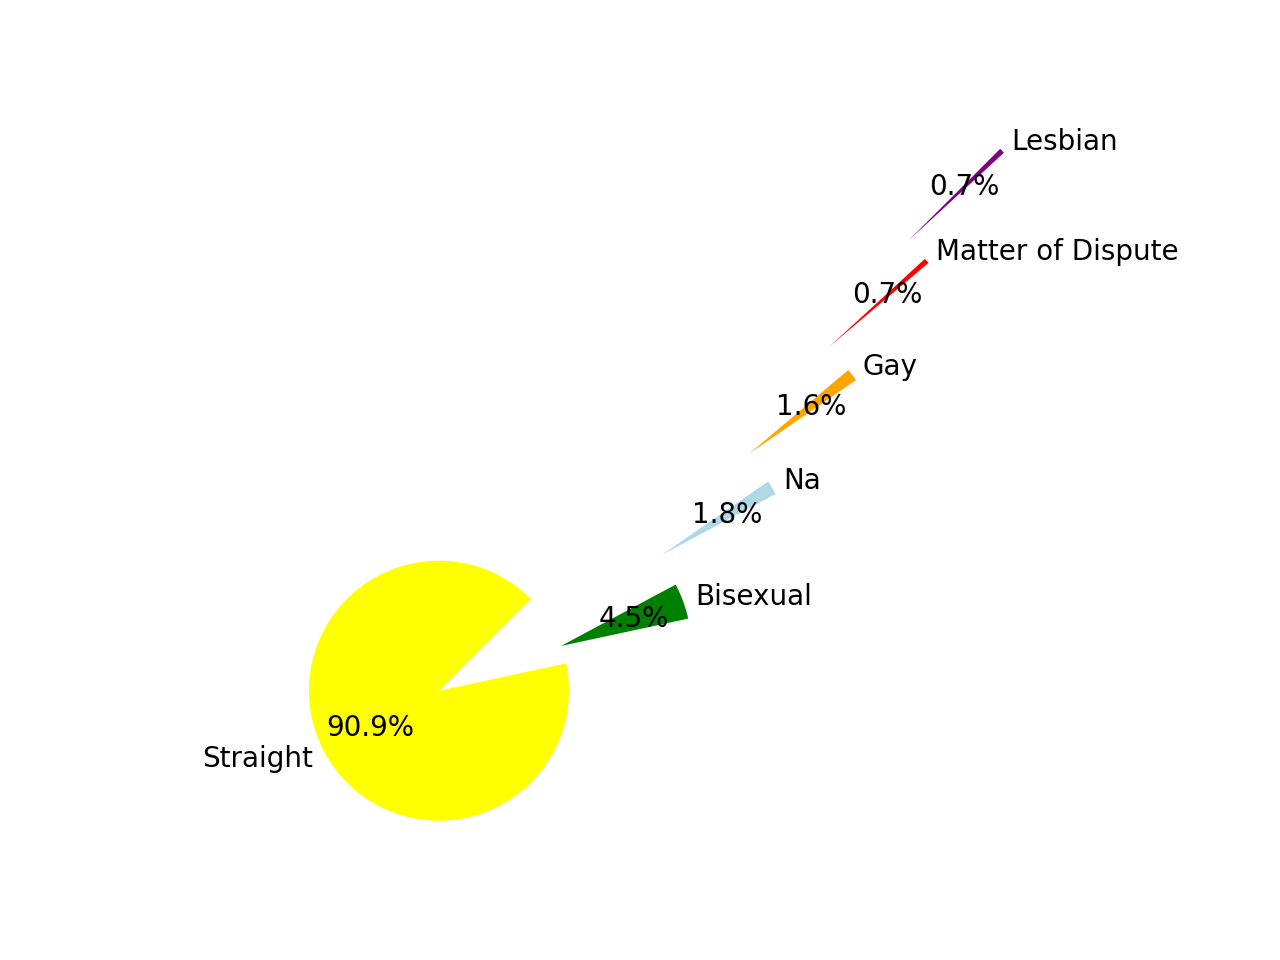

In [10]:
# Plot Pie Chart according to race
sexual_orientation = ["Straight", "Bisexual", "Na", "Gay", "Matter of Dispute", "Lesbian"]
award_count = [408,20,8,7,3,3]
colors = ["yellow","green","lightblue","orange","red","purple"]
explode = (0,1,2,3,4,5)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(award_count, explode=explode, labels=sexual_orientation, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("./SexualOrientationPyPies.png")
plt.show()